# Exploratory Analysis
In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. First, I combined the various LGBT related biases into one as 'Anti-LGBT'. I also, cleaned up some other biases to make the entire column uniform as possible. Second, I cleaned the offender ethnicity column for the same reason. The resulting dataset lists 56 separate alleged hate crimes, in Austin, TX, since 2017. 

Out of the total number of reported, alleged incidents, 32.14% were directed at the LGBT Community. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
# Importing & examining the cleaned dataset
df = pd.read_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final.csv")
display(df.head())
print('----------------------------------')
display(df.tail())

,date_of_incident,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,offender_race_ethnicity,offense,offense_location,bias
0,1/1/2017,0,1,0,1,caucasian,Aggravated Assault,Park/Playground,anti-african american
1,2/1/2017,0,1,0,1,african american,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,anti-caucasian
2,3/21/2017,0,0,0,0,unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,anti-jewish
3,4/12/2017,0,0,0,0,caucasian,Simple Assault,Air/Bus/Train Terminal,anti-jewish
4,5/15/2017,1,0,1,2,caucasian,Simple Assault,Residence/Home,anti-lgbt


----------------------------------


,date_of_incident,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,offender_race_ethnicity,offense,offense_location,bias
51,3/22/2020,0,1,0,0,unknown,Criminal Mischief,Residence/Home,anti-lgbt
52,4/20/2020,0,1,0,0,unknown,Criminal Mischief,Church/Synagogue/Temple/Mosque,anti-buddhist
53,4/29/2020,0,1,0,1,african american,Assault by Threat,Department/Discount Store,anti-lgbt
54,5/17/2020,0,1,0,1,caucasian,Assault by Contact,Convenience Store,anti-african american
55,5/20/2020,0,1,0,1,caucasian,Assault with Injury,Streets/Highway/Road/Alley,anti-hispanic


In [3]:
# Creating an index out of the 'date' column annd converting the non-numeric columns into categories
df['date_of_incident'] = df['date_of_incident'].astype('datetime64')
df.set_index(['date_of_incident'], inplace=True)
df['bias'] = df['bias'].astype('category')
df['offense'] = df['offense'].astype('category')
df['offense_location'] = df['offense_location'].astype('category')
df['offender_race_ethnicity'] = df['offender_race_ethnicity'].astype('category')

# Reexamining the dataset
display(df.index)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.dtypes)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018-02-22', '2018-03-02', '2018-03-06', '2018-03-08',
               '2018-04-01', '2018-04-30', '2018-05-21', '2018-06-16',
               '2018-06-28', '2018-08-13', '2018-08-25', '2018-09-09',
               '2018-09-11', '2018-10-11', '2018-10-19', '2018-12-15',
               '2018-12-29', '2019-01-19', '2019-02-22', '2019-03-31',
               '2019-04-04', '2019-06-11', '2019-08-06', '2019-08-12',
               '2019-08-24', '2019-11-23', '2019-12-19', '2019-12-30',
               '2020-03-01', '2020-03-08', '2020-03-22', '2020-03-22',
               '2020-04-20', '2020-04-29', '2020-05-17', '2020-05-20'],
     

----------------------------------


,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,offender_race_ethnicity,offense,offense_location,bias
date_of_incident,,,,,,,,
2017-01-01,0,1,0,1,caucasian,Aggravated Assault,Park/Playground,anti-african american
2017-02-01,0,1,0,1,african american,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,anti-caucasian
2017-03-21,0,0,0,0,unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,anti-jewish
2017-04-12,0,0,0,0,caucasian,Simple Assault,Air/Bus/Train Terminal,anti-jewish
2017-05-15,1,0,1,2,caucasian,Simple Assault,Residence/Home,anti-lgbt


----------------------------------


,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,offender_race_ethnicity,offense,offense_location,bias
date_of_incident,,,,,,,,
2020-03-22,0,1,0,0,unknown,Criminal Mischief,Residence/Home,anti-lgbt
2020-04-20,0,1,0,0,unknown,Criminal Mischief,Church/Synagogue/Temple/Mosque,anti-buddhist
2020-04-29,0,1,0,1,african american,Assault by Threat,Department/Discount Store,anti-lgbt
2020-05-17,0,1,0,1,caucasian,Assault by Contact,Convenience Store,anti-african american
2020-05-20,0,1,0,1,caucasian,Assault with Injury,Streets/Highway/Road/Alley,anti-hispanic


----------------------------------


number_of_victims_under_18         int64
number_of_victims_over_18          int64
number_of_offenders_under_18       int64
number_of_offenders_over_18        int64
offender_race_ethnicity         category
offense                         category
offense_location                category
bias                            category
dtype: object

### Question 1. How are reported incidences in Austin distributed according to motivation? 

anti-lgbt                18
anti-african american    18
anti-hispanic             7
anti-jewish               4
anti-muslim               4
anti-caucasian            3
anti-buddhist             1
anti-disability           1
Name: bias, dtype: int64

----------------------------------


anti-lgbt                0.321429
anti-african american    0.321429
anti-hispanic            0.125000
anti-jewish              0.071429
anti-muslim              0.071429
anti-caucasian           0.053571
anti-buddhist            0.017857
anti-disability          0.017857
Name: bias, dtype: float64

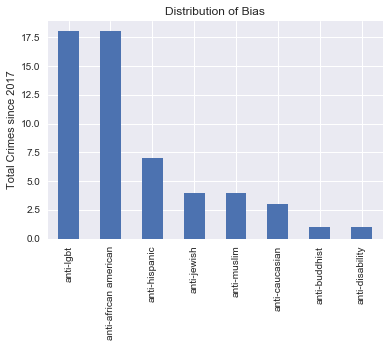

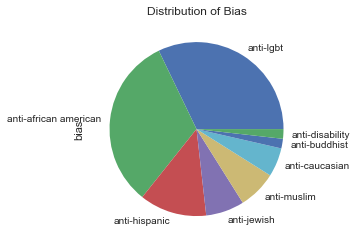

In [15]:
# Creating a dataframe of the biases
bias = df['bias'].value_counts()
display(bias)

bias_pct = df['bias'].value_counts(normalize=True)

# Displaying the bias values as proportions
print('----------------------------------')
display(df['bias'].value_counts(normalize=True))

# Visualizing the bias dataframe
bias.plot.bar()
plt.ylabel('Total Crimes since 2017')
plt.title('Distribution of Bias')
plt.show()

# Visualizing bias values as proportions
bias_pct.plot.pie()
plt.title('Distribution of Bias')
plt.show()

### Question 2. How are hate crimes perpetuated? 

Assault                21
Simple Assault          8
Intimidation            7
Criminal Mischief       5
Vandalism               4
Aggravated Assault      3
Destruction             2
Assault with Injury     1
Assault by Contact      1
Theft                   1
Robbery                 1
Burglary/Assault        1
Assault by Threat       1
Name: offense, dtype: int64

----------------------------------


Assault                0.375000
Simple Assault         0.142857
Intimidation           0.125000
Criminal Mischief      0.089286
Vandalism              0.071429
Aggravated Assault     0.053571
Destruction            0.035714
Assault with Injury    0.017857
Assault by Contact     0.017857
Theft                  0.017857
Robbery                0.017857
Burglary/Assault       0.017857
Assault by Threat      0.017857
Name: offense, dtype: float64

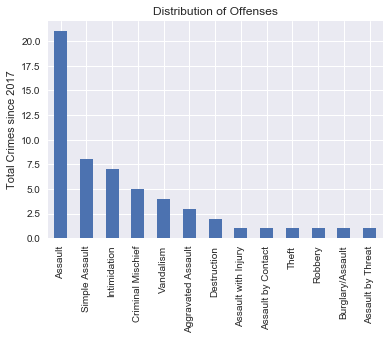

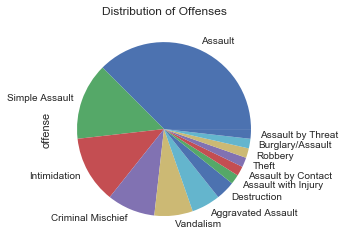

In [16]:
# Create a dataframe for the offense values
offense_count = df.offense.value_counts()
display(offense_count)

# Displaying the offense values as proportions
print('----------------------------------')
offense_count_pct = df.offense.value_counts(normalize=True)
display(offense_count_pct)


# Visualizing the offense values
offense_count.plot.bar()
plt.ylabel('Total Crimes since 2017')
plt.title('Distribution of Offenses')
plt.show()

# Visualizing the offense values as proportions
offense_count_pct.plot.pie()
plt.title('Distribution of Offenses')
plt.show()

### Question 3. What is the race/ethnicity of the offenders?      

caucasian                    26
hispanic                     12
unknown                      11
african american              5
hispanic (2) caucasian(2)     1
asian                         1
Name: offender_race_ethnicity, dtype: int64

----------------------------------


caucasian                    0.464286
hispanic                     0.214286
unknown                      0.196429
african american             0.089286
hispanic (2) caucasian(2)    0.017857
asian                        0.017857
Name: offender_race_ethnicity, dtype: float64

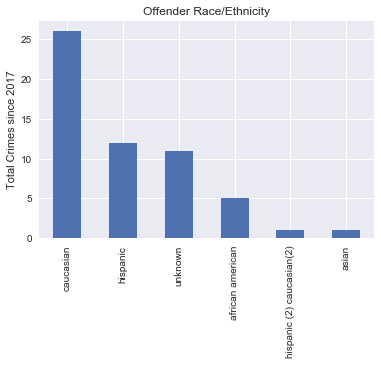

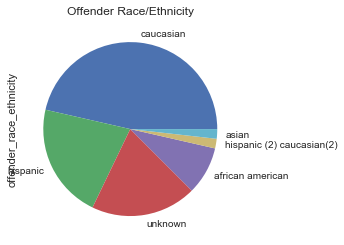

In [18]:
# Create a dataframe for the offender ethnicity values
offenders_count = df['offender_race_ethnicity'].value_counts()
display(offenders_count)
print('----------------------------------')

# Displaying the offender ethnicity values as proportions
offenders_count_pct = df.offender_race_ethnicity.value_counts(normalize=True)
display(offenders_count_pct)

# Visualizing the offender ethnicity values
offenders_count.plot.bar()
plt.ylabel('Total Crimes since 2017')
plt.title('Offender Race/Ethnicity')
plt.show()

# Visualizing the offender ethnicity values as proportions
offenders_count_pct.plot.pie()
plt.title('Offender Race/Ethnicity')
plt.show()

Note...the above 'Offender' graph has an instance of 'Hispanic (2), Caucasian (2)' as a single column because of an incident that occurred on 1/19/19 https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective -- 2 of the offenders were white, and the other 2 were hispanic. 

### Question 4. Where in Austin do hate crimes often take place? 

Residence/Home                        11
Highway/Road/Alley/Street/Sidewalk     6
Streets/Highway/Road/Alley             6
Bar/Nightclub                          5
Parking Lot/Garage                     5
Convenience Store                      4
Highway/Road/Street                    4
Park/Playground                        2
School-Elementary/Secondary            1
Department/Discount Store              1
Restaurant                             1
Shelter-Mission/Homeless               1
Parking Lot                            1
Hotel/Motel                            1
Drug Store/Dr.'s office/Hospital       1
Church/Synagogue                       1
Parking/Drop Lot                       1
Bank/Savings and Loan                  1
Church/Synagogue/Temple/Mosque         1
Other/unknown                          1
Air/Bus/Train Terminal                 1
Name: offense_location, dtype: int64

----------------------------------


Residence/Home                        0.196429
Highway/Road/Alley/Street/Sidewalk    0.107143
Streets/Highway/Road/Alley            0.107143
Bar/Nightclub                         0.089286
Parking Lot/Garage                    0.089286
Convenience Store                     0.071429
Highway/Road/Street                   0.071429
Park/Playground                       0.035714
School-Elementary/Secondary           0.017857
Department/Discount Store             0.017857
Restaurant                            0.017857
Shelter-Mission/Homeless              0.017857
Parking Lot                           0.017857
Hotel/Motel                           0.017857
Drug Store/Dr.'s office/Hospital      0.017857
Church/Synagogue                      0.017857
Parking/Drop Lot                      0.017857
Bank/Savings and Loan                 0.017857
Church/Synagogue/Temple/Mosque        0.017857
Other/unknown                         0.017857
Air/Bus/Train Terminal                0.017857
Name: offense

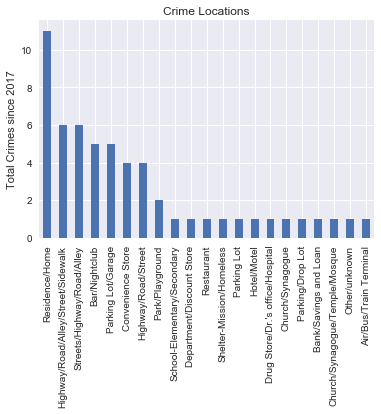

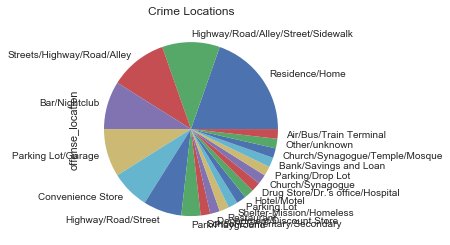

In [23]:
# Displaying the locations where hate crimes take place in Austin
location = df.offense_location.value_counts()
display(location)
print('----------------------------------')
# Displaying 'offense location' as proportions
location_pct = df.offense_location.value_counts(normalize=True)
display(location_pct)

location.plot.bar()
plt.ylabel('Total Crimes since 2017')
plt.title('Crime Locations')
plt.show()

location_pct.plot.pie()
plt.title('Crime Locations')
plt.show()

### Question 5. Any correlations between victims and offenders? 

,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18
number_of_victims_under_18,1.000000,-0.554402,0.572413,-0.005228
number_of_victims_over_18,-0.554402,1.000000,-0.398025,0.342371
number_of_offenders_under_18,0.572413,-0.398025,1.000000,-0.180482
number_of_offenders_over_18,-0.005228,0.342371,-0.180482,1.000000


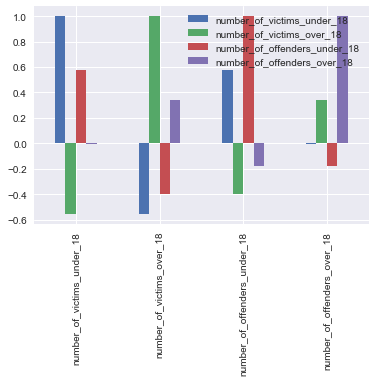

In [8]:
# Examining correlations between victims & offenders
df_corr = df.corr()

display(df_corr)
df_corr.plot.bar()
plt.show()